## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import gzip
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
!ls zippedData

bom.movie_gross.csv
imdb.name.basics.csv
imdb.title.akas.csv
imdb.title.basics.csv
imdb.title.crew.csv
imdb.title.principals.csv
imdb.title.ratings.csv
rt.movie_info.tsv
rt.reviews.tsv
tmdb.movies.csv
tn.movie_budgets.csv


In [2]:

movies_gross = pd.read_csv("zippedData/bom.movie_gross.csv")
#Titles, Studio, Domestic Gross, Foreign Gross and Year
basics_names = pd.read_csv("zippedData/imdb.name.basics.csv")
#Nconst, Primary Name, Primary Profession, Known for titles(title_id)
#just producers
akas= pd.read_csv("zippedData/imdb.title.akas.csv")
#Title ID's, Ordering, Title, Region, Language, Types, Attributes, Original Title
basics_titles = pd.read_csv("zippedData/imdb.title.basics.csv")
#Tconst, Primary Title, Original Title, Start Year, Runtime Minutes, Genres
#crew = pd.read_csv("zippedData/imdb.title.crew.csv")
#Tconst, Directors, Writers
principals = pd.read_csv("zippedData/imdb.title.principals.csv")
#Tconst, Ordering, Nconst, Category, Job, Characters
ratings = pd.read_csv("zippedData/imdb.title.ratings.csv")
#Tconst, Average Rating, Number of Votes
movies = pd.read_csv("zippedData/tmdb.movies.csv")
#Genre Id, Id, Original Language, Original Language, Original Title, Popularity, Release Date, Title, Vote Average, Vote count
movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv")
#Id, Release Date, Movie Name, Production Budget, Domestic Gross, Worldwide Gross
reviews = pd.read_csv('zippedData/rt.reviews.tsv', sep = '\t', encoding = 'unicode_escape')
#['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher','date']
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv', sep = '\t', encoding = 'unicode_escape')
#['id', 'synopsis', 'rating', 'genre', 'director', 'writer','theater_date', 'dvd_date', 'currency', 'box_office', 'runtime','studio']


In [3]:
basics_names

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [57]:
producer = (basics_names.loc[basics_names['primary_profession'] == 'producer'])
#finds only information where the primary profession is equal to producer
#save that data frame in in variable called producer 

producer = producer[producer['known_for_titles'].notna()]
#filters out every NAN in the known for titles column
#only wnat producers who have worked on product

producer_shape = producer.shape
#stores the shape of producer

title_codes = producer['known_for_titles'].tolist()
#captures all title keys into a list

p_names = producer['primary_name'].tolist()
#captures list of producer names

ratings = ratings[ratings['tconst'].notna()]
#ratings = ratings[ratings['average'].notna()]

tcodes = ratings['tconst'].tolist()
#list of individual title codes from ratings dataframe

avg_rate = ratings['averagerating'].tolist()
#list of individual rating from ratings

#tcode_rating = [(tcode, rating) for tcode,rating in zip(tcodes, avg_rate)]
#a list of tuples containing the tcode and its rating

tcode_rating_dict = {tcode:rating for tcode,rating in zip(tcodes, avg_rate)}
# dict of tdcodes as key and ratings as values

#relevant_produce = [(nconstant, pname,Know_for_titles) for  in zip(tcodes, avg_rate)]

producer['rating_replace'] = producer['known_for_titles']
#creates a new column in producer with the same information from known for titles
#column will contain a tuple with a title id and a rating in place with the producer

producer['title_split'] = producer['known_for_titles'].apply(lambda x : x.split(','), producer['known_for_titles'])

ratings

def to_dict(list_of_title_codes, dict_of_ratings_titles):
    ltc = list_of_title_codes
    #a list that contains lists of title codes associated with prooducers
    drt = dict_of_ratings_titles
    # a complete dicitonary of all title codes and their ratings
    #title code used as key and rating used as value
    elist = []
    dummy = []
    inorder_tc_dict ={}
    for i in ltc:
        #for each list of titles in list_of_title_codes
        #a list of lists because soem producers have produced more than one movie
        elist.append(i.split(','))
        #splits by comma as string delimiter and appends to elist, the empty list
        #elist only contains title codes for movies named producers have worked on
        #producer names/titles taken from title_codes
    for j in elist:
        #for each title code list in elist
        for x in j:
            #for each title code in each list in the elist
            if x in list(drt.keys()):
                #if title code is found within the complete dictionary of title codes and raitngs
                inorder_tc_dict[x] = drt[x]
                #populate inorder_tc_dict with the titlecode as key and the rating as value
                #should only contain title codes for movies with named producers
    return (inorder_tc_dict)

known_title_ratings = to_dict(title_codes,tcode_rating_dict)
known_title_ratings

{'tt2281529': 8.2,
 'tt2071465': 6.0,
 'tt9026184': 7.0,
 'tt8011324': 7.1,
 'tt7365040': 7.0,
 'tt9432968': 7.9,
 'tt5462882': 6.1,
 'tt9593792': 6.1,
 'tt9676940': 4.3,
 'tt7128732': 6.8,
 'tt3345474': 6.5,
 'tt3345472': 7.0,
 'tt2404217': 7.3,
 'tt1861982': 7.1,
 'tt2608566': 7.1,
 'tt7274546': 7.4,
 'tt3509862': 6.6,
 'tt2633958': 6.4,
 'tt2287666': 7.0,
 'tt4520256': 9.0,
 'tt4838956': 8.4,
 'tt1486834': 6.8,
 'tt1173687': 7.0,
 'tt6026818': 7.9,
 'tt4738174': 6.7,
 'tt3645988': 6.7,
 'tt6917210': 5.8,
 'tt6900448': 7.1,
 'tt8837842': 7.0,
 'tt7724146': 9.8,
 'tt5805470': 6.3,
 'tt7639528': 6.7,
 'tt2716554': 6.2,
 'tt1722516': 5.5,
 'tt8921800': 6.3,
 'tt8945080': 7.9,
 'tt2195490': 6.5,
 'tt4841648': 5.2,
 'tt9807524': 8.8,
 'tt10276706': 3.6,
 'tt2379318': 6.3,
 'tt2355540': 7.2,
 'tt1582519': 7.6,
 'tt4322012': 3.1,
 'tt5988898': 6.1,
 'tt2924336': 7.2,
 'tt6129048': 5.7,
 'tt4261942': 6.5,
 'tt5313906': 6.4,
 'tt6465308': 3.6,
 'tt2419530': 7.6,
 'tt1251743': 5.3,
 'tt1438173

In [51]:
def sep_movie(name, movie_list):
    movie_list_split = movie_list.split(',')
    #splits the data on the comma
    empty_dict = {}
    empty_list = []

    if len(movie_list_split) == 1:
        #if the length of movie_list_split is equal to 1
        #there is only one title in it
        empty_dict[movie_list_split[0]] = name
        #assigns that itle as key and the producer name as value
    else:
        for i in movie_list_split:
        #if it has more than one title in it
            empty_dict[i] = name
            #it populates dict with the titel as key and every value as producer name
    return empty_dict
    #returns a dictionary

keeper =  [sep_movie(b,n) for b,n in zip(p_names,title_codes)]
#saves the return value of sep_movie, which is a dict, to keeper which is a list
#keeper is a list of dictionaries, each dictionary is segmented by title as key and producers name
#as value. Each dict in the list has an equal number of entries as movie the producer produced
keeper

[{'tt0094574': 'G. Robert Blakey',
  'tt0206501': 'G. Robert Blakey',
  'tt9412600': 'G. Robert Blakey',
  'tt2281529': 'G. Robert Blakey'},
 {'tt0410055': 'Neil Bregman',
  'tt0816539': 'Neil Bregman',
  'tt0283805': 'Neil Bregman',
  'tt0357585': 'Neil Bregman'},
 {'tt0118858': 'Gerry Flahive',
  'tt0214822': 'Gerry Flahive',
  'tt3304616': 'Gerry Flahive',
  'tt0206501': 'Gerry Flahive'},
 {'tt1083853': 'Sandra Itkoff',
  'tt0497398': 'Sandra Itkoff',
  'tt1377278': 'Sandra Itkoff',
  'tt0795174': 'Sandra Itkoff'},
 {'tt0238994': 'Martin Paul-Hus',
  'tt0484881': 'Martin Paul-Hus',
  'tt2071465': 'Martin Paul-Hus',
  'tt0402378': 'Martin Paul-Hus'},
 {'tt8970118': 'Alberto Gabrielli'},
 {'tt9001572': 'Xavier Higgs'},
 {'tt9026184': 'Giles Edwards'},
 {'tt9129966': 'Héctor Rivero'},
 {'tt9129966': 'Nicolás Rijman'},
 {'tt8011324': 'Sudhan Sundaram'},
 {'tt7365040': 'Madeleine Tibaldi'},
 {'tt8839894': 'Davit Tatulashvili'},
 {'tt9432968': 'Nilan Weerasinghe'},
 {'tt5462882': 'Yûta Ka

In [61]:
producer['title_split'] = producer['known_for_titles'].map(lambda x : x.split(','))
#splits comma separated list obj in known_for_titles

In [68]:
exploded = producer.explode('title_split')
#used exploded method tpexpand known_title_column into mulitpiple rows


In [79]:
prod_title_rate_merge_raw = exploded.merge(ratings, left_on= 'title_split', right_on = 'tconst')
#save teh exploded dataframe to prod_title_rate_raw

In [100]:
prod_title_rate_merge = prod_title_rate_merge_raw.drop(['birth_year', 'death_year', 'rating_replace', 'title_split', 'numvotes'], axis=1)
#removed extra tables
prod_title_rate_merge['producer_counts']=(prod_title_rate_merge['primary_name'].value_counts())
#keeps track of how many moveis each producer produced
prod_title_rate_merge.head(20)


,nconst,primary_name,primary_profession,known_for_titles,tconst,averagerating
0,nm0086850,G. Robert Blakey,producer,"tt0094574,tt0206501,tt9412600,tt2281529",tt2281529,8.2
1,nm0667045,Martin Paul-Hus,producer,"tt0238994,tt0484881,tt2071465,tt0402378",tt2071465,6.0
2,nm10165770,Giles Edwards,producer,tt9026184,tt9026184,7.0
3,nm10191214,Sudhan Sundaram,producer,tt8011324,tt8011324,7.1
4,nm10183127,Umesh,producer,tt8011324,tt8011324,7.1
5,nm10184530,Jayaram G.,producer,tt8011324,tt8011324,7.1
6,nm10333365,Madeleine Tibaldi,producer,tt7365040,tt7365040,7.0
7,nm10352669,Nilan Weerasinghe,producer,tt9432968,tt9432968,7.9
8,nm10364966,Yûta Kano,producer,tt5462882,tt5462882,6.1
9,nm5094636,Ken Tsuchiya,producer,"tt2038118,tt5462882",tt5462882,6.1


In [103]:
agg_funcs = {'averagerating': 'mean'}
prod_average = prod_title_rate_merge.groupby(prod_title_rate_merge['primary_name']).aggregate(agg_funcs)
#produces a new dataframe to group by producer name and get the mean of all their ratings

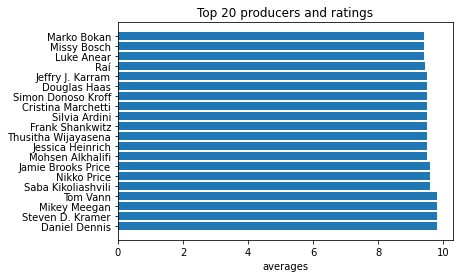

In [162]:
prod_average.sort_values(by ='averagerating', ascending=False)
#final df with the producees anme and the average rating score of every movie theyve produced
prod_avg_top20= prod_average.sort_values(by ='averagerating', ascending=False).head(20)
#gets top 20 name and top 20 ratings
prod_avg_top20_rate_list= prod_avg_top20['averagerating'].tolist()
#makes a list of the top 20 ratings
prod_avg_top20_rate_list
prod_avg_top20
prod_avg_top20_name_list= prod_avg_top20.index.tolist()
makes a lsit of the top 20 names
prod_avg_top20_name_list
fig, ax = plt.subplots()
#creates a plot
ax.barh( prod_avg_top20_name_list, prod_avg_top20_rate_list)
#creates a bar chart with names as the x and ratings as the y)
ax.set_title('Top 20 producers and ratings')
ax.set_xlabel('averages');

In [126]:
tconst_ptitle_genres =basics_titles[['tconst', 'primary_title', 'genres']]
#subset of basics_titles containing just the title id, teh primary title of the movie and its genres
tconst_pname_avgRate = prod_title_rate_merge[['tconst', 'primary_name', 'averagerating']]
#subset of prod_title_rate_merge that conatians just the title ids, the producer name, and the average rating
tconst_to_title_merge = tconst_pname_avgRate.merge(tconst_ptitle_genres, left_on= 'tconst', right_on='tconst')
#subset of data merged on title id to look like: title id, producer name, average rating, movie title, movie genre
tconst_to_title_merge

,tconst,primary_name,averagerating,primary_title,genres
0,tt2281529,G. Robert Blakey,8.2,The Wall Street Conspiracy,Documentary
1,tt2071465,Martin Paul-Hus,6.0,Friends from France,"Adventure,Drama,History"
2,tt9026184,Giles Edwards,7.0,Girl on the Third Floor,Horror
3,tt8011324,Sudhan Sundaram,7.1,Seethakaathi,Drama
4,tt8011324,Umesh,7.1,Seethakaathi,Drama
...,...,...,...,...,...
19087,tt5522892,Burak Memisoglu,3.1,Azazil 2: Büyü,"Horror,Thriller"
19088,tt2847238,Peter Stylianou,5.7,Who Needs Enemies,"Crime,Drama,Thriller"
19089,tt8620146,Ajay Kanayalal Sukheja,6.2,Re Raya,Sport
19090,tt8665746,Ashok Reddy Gummakonda,7.0,Rx 100,"Action,Drama"


In [150]:
#movie_budgets
name_budget_gross_rDAte=movie_budgets[['movie', 'production_budget', 'domestic_gross', 'worldwide_gross', 'release_date']]
#subset of movie_budget containing : Release Date, Movie Name, Production Budget, Domestic Gross, Worldwide Gross
name_budget_gross_rDAte
#tconst_to_title_merge = tconst_pname_avgRate.merge(tconst_ptitle_genres, left_on= 'tconst', right_on='tconst')
merge_check_movie_budgets = name_budget_gross_rDAte.merge(tconst_to_title_merge, left_on='movie', right_on ='primary_title' )
#called merege_check to check data, worried because I saw a
#dramatic change in number of rows
#could be problematic
merge_check_movie_budgets
#upon looking I noticed it showed that multiple producers worked on one movies, may present problems
movies_gross_noNAN=movies_gross.dropna()
#moive_gross with no NAN values
#Titles, Studio, Domestic Gross, Foreign Gross and Year
movies_gross_noNAN

merge_check_movies_gross = movies_budgets_noNAN.merge(tconst_to_title_merge, left_on='title', right_on ='primary_title' )
#merge of movies_gross_noNAN and tconst_to_title_merge, mereg eon movies name
#should contain title, studio, domestic gross, foreign gross, year, producer name, average rating, title, genres

merge_check_movies_gross
#len = 524
#print(len(merge_check_movie_budgets.movie), len(merge_check_movies_gross.title))



,title,studio,domestic_gross,foreign_gross,year,tconst,primary_name,averagerating,primary_title,genres
0,The King's Speech,Wein.,135500000.0,275400000,2010,tt1504320,Iain Canning,8.0,The King's Speech,"Biography,Drama,History"
1,The Karate Kid,Sony,176600000.0,182500000,2010,tt1155076,Xiaoli Han,6.2,The Karate Kid,"Action,Drama,Family"
2,Black Swan,FoxS,107000000.0,222400000,2010,tt0947798,Brian Oliver,8.0,Black Swan,"Drama,Thriller"
3,Black Swan,FoxS,107000000.0,222400000,2010,tt0947798,Tyler Thompson,8.0,Black Swan,"Drama,Thriller"
4,Robin Hood,Uni.,105300000.0,216400000,2010,tt0955308,Michael Costigan,6.6,Robin Hood,"Action,Adventure,Drama"
...,...,...,...,...,...,...,...,...,...,...
519,7 Days in Entebbe,Focus,3300000.0,5400000,2018,tt5466186,Kobi Holly,5.8,7 Days in Entebbe,"Action,Drama,History"
520,Suspiria,Amazon,2500000.0,5400000,2018,tt1034415,Francesco Melzi d'Eril,6.8,Suspiria,"Fantasy,Horror,Mystery"
521,Suspiria,Amazon,2500000.0,5400000,2018,tt1034415,Gabriele Moratti,6.8,Suspiria,"Fantasy,Horror,Mystery"
522,Wildlife,IFC,1100000.0,2000000,2018,tt5929754,Andrew Duncan,6.9,Wildlife,Drama


In [167]:
merge_check_movie_budgets
#dataframe_name[dataframe_name['column'] != '$0']
merge_check_movie_budgets[merge_check_movie_budgets['worldwide_gross'] != '$0']
#removes any rows with no currency valur
#df['col_to_clean'] = df['col_to_clean'].apply(lambda x: x.replace('$', '')).apply(lambda x: x.replace(',', '')).astype(np.int64)
merge_check_movie_budgets['total_income'] = merge_check_movie_budgets['worldwide_gross'].apply(lambda x: x.replace('$', '')).apply(lambda x: x.replace(',', '')).astype(np.int64)
#takes worldwide_gross currency string values and turns them into integers and puts them in a new column
merge_check_movie_budgets['prod_budget'] = merge_check_movie_budgets['production_budget'].apply(lambda x: x.replace('$', '')).apply(lambda x: x.replace(',', '')).astype(np.int64)
#takes production budget currency string values and turns them into integers and puts them in a new column
name_prodBudg_Tincome=merge_check_movie_budgets[['primary_name','prod_budget', 'total_income']]
#creates a subset dataframe of just the producer name, the production budget and the worldwide gross income
name_prodBudg_Tincome['total_income_real'] = name_prodBudg_Tincome['total_income']- name_prodBudg_Tincome['prod_budget']
# creates new column htat shows the actual total income of the world wide gross income minus the production budget
name_prodBudg_Tincome
#prod_avg_top20_name_list #####this is the list of 20 producers names

<ipython-input-167-09cfd09e6f99>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_prodBudg_Tincome['total_income_real'] = name_prodBudg_Tincome['total_income']- name_prodBudg_Tincome['prod_budget']


,primary_name,prod_budget,total_income,total_income_real
0,Wolfgang Ramml,300000000,879620923,579620923
1,Bennett Schneir,220000000,313477717,93477717
2,Michael Costigan,210000000,322459006,112459006
3,Michael Costigan,99000000,84747441,-14252559
4,Wen-ge Xiao,200000000,1215392272,1015392272
...,...,...,...,...
762,Jeff Holtz,40000,3632,-36368
763,Dennis Mengelt,40000,3632,-36368
764,Phyllis Legge Gallisath,40000,3632,-36368
765,Michael Chowanski,40000,3632,-36368


In [182]:
top_20_producers=pd.DataFrame(prod_avg_top20_name_list, columns=['producer_names'])
top_20_producers
#name_prodBudg_Tincome #### merge on name ['primary_name']
#merge_check_movie_budgets = name_budget_gross_rDAte.merge(tconst_to_title_merge, left_on='movie', right_on ='primary_title' )
#top_20_prod_budg_income = top_20_producers.merge(name_prodBudg_Tincome, left_on='producer_names', right_on='primary_name')
#top_20_prod_budg_income = name_prodBudg_Tincome.merge(top_20_producers, left_on= 'primary_name', right_on='producer_names')
#top_20_prod_budg_income

,producer_names
0,Daniel Dennis
1,Steven D. Kramer
2,Mikey Meegan
3,Tom Vann
4,Saba Kikoliashvili
5,Nikko Price
6,Jamie Brooks Price
7,Mohsen Alkhalifi
8,Jessica Heinrich
9,Thusitha Wijayasena


In [175]:
top_20_producers


,producer_names,primary_name,prod_budget,total_income,total_income_real
